In [1]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis(EDA) of training data

In [3]:
# Read the testing dataset
df1=pd.read_csv('Titanic_train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Remove unwanted columns from dataset
df3=df1.drop(['PassengerId','Name','Ticket'],axis=1)
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [5]:
# To get info about training dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [6]:
# To find the duplicates from the dataset
duplicated_rows=df3[df3.duplicated()]
duplicated_rows

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
47,1,3,female,NaN,0,0,7.7500,NaN,Q
76,0,3,male,NaN,0,0,7.8958,NaN,S
77,0,3,male,NaN,0,0,8.0500,NaN,S
87,0,3,male,NaN,0,0,8.0500,NaN,S
95,0,3,male,NaN,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,NaN,S
877,0,3,male,19.0,0,0,7.8958,NaN,S
878,0,3,male,NaN,0,0,7.8958,NaN,S
884,0,3,male,25.0,0,0,7.0500,NaN,S


In [7]:
## To remove duplicated values from dataset
df3.drop_duplicates(inplace=True)
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,NaN,Q
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [8]:
# T0 know the shape of the training data
df3.shape

(784, 9)

In [9]:
# To find the null values in the dataset
df3.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         106
SibSp         0
Parch         0
Fare          0
Cabin       581
Embarked      2
dtype: int64

In [10]:
## To find the median and mode values for nullvalues columns in dataset
print(df3['Age'].median())
print(df3['Cabin'].mode())
print(df3['Embarked'].mode())

28.25
0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object
0    S
Name: Embarked, dtype: object


In [11]:
# To replace the nullvalues with appropriate median and mode values in dataset
df3['Age'].fillna(value=df3['Age'].median(),inplace=True)
df3['Cabin'].fillna(value=df3['Cabin'].mode().iloc[0],inplace=True)
df3['Embarked'].fillna(value=df3['Embarked'].mode().iloc[0],inplace=True)

In [12]:
# again check for null values
df3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### statistical summary of the of training dataset

In [14]:
# Then describe the mode to get the statistical summary of the dataset
df3.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.650408,0.522959,0.415816,34.711740
std,0.492507,0.855056,13.734925,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.250000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# To find the median for numerical columns in training dataset
numeric_data=df3.select_dtypes(include=['int','float'])
numeric_data.median()

Survived     0.00
Pclass       3.00
Age         28.25
SibSp        0.00
Parch        0.00
Fare        15.90
dtype: float64

In [16]:
# To find the mode for categorical columns in the training dataset
categorical_data=df3.select_dtypes(include=['object'])
categorical_data.mode()

,Sex,Cabin,Embarked
0,male,B96 B98,S


In [17]:
# To find the standard deviation in the training dataset
numeric_data.std()

Survived     0.492507
Pclass       0.855056
Age         13.734925
SibSp        0.986231
Parch        0.836922
Fare        52.160151
dtype: float64

### Exploratory Data Analysis(EDA) of training data

In [19]:
# Read the testing data set
df2=pd.read_csv('Titanic_test.csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
# To remove unwanted columns from testing dataset 
df4=df2.drop(['PassengerId','Name','Ticket'],axis=1)
df4

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [21]:
# To get information about testing dataset
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     object 
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


In [22]:
# To find the duplicated values in testing dataset
duplicated_rows=df4[df4.duplicated()]
duplicated_rows

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
79,3,female,24.0,0,0,7.7500,NaN,Q
83,3,male,NaN,0,0,7.8958,NaN,S
93,3,male,NaN,0,0,8.0500,NaN,S
102,3,male,NaN,0,0,7.7500,NaN,Q
107,3,male,NaN,0,0,7.7500,NaN,Q
124,3,male,NaN,0,0,7.7500,NaN,Q
180,2,male,30.0,0,0,13.0000,NaN,S
183,3,male,NaN,0,0,7.7500,NaN,Q
219,3,male,NaN,0,0,8.0500,NaN,S
227,3,female,NaN,0,0,7.7500,NaN,Q


In [23]:
# To remove duplicated rows from testing dataset
df4.drop_duplicates(inplace=True)

In [24]:
# again check for duplicated values
df4.duplicated().sum()

0

In [25]:
# find the null values in testing dataset
df4.isnull().sum()

Pclass        0
Sex           0
Age          60
SibSp         0
Parch         0
Fare          1
Cabin       293
Embarked      0
dtype: int64

In [26]:
## To find the median and mode values for nullvalues columns in testing dataset
print(df4['Age'].median())
print(df4['Fare'].median())
print(df4['Cabin'].mode())


27.5
15.2458
0    B57 B59 B63 B66
Name: Cabin, dtype: object


In [27]:
# To replace null values with median,mode for null values columns
df4['Age'].fillna(value=df4['Age'].median(),inplace=True)
df4['Fare'].fillna(value=df4['Fare'].median(),inplace=True)
df4['Cabin'].fillna(value=df4['Cabin'].mode().iloc[0],inplace=True)

In [28]:
# again check for any null values
df4.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### statistical summary of the of testing dataset

In [30]:
# To describe the testing dataset 
df4.describe()

,Pclass,Age,SibSp,Parch,Fare
count,384.000000,384.000000,384.000000,384.000000,384.000000
mean,2.213542,29.902344,0.479167,0.427083,37.886827
std,0.852717,13.212298,0.922356,1.016776,57.694355
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000,7.925000
50%,2.000000,27.500000,0.000000,0.000000,15.245800
75%,3.000000,36.125000,1.000000,0.000000,36.750000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [31]:
# To find the median for numerical columns in testing dataset
numeric_col=df4.select_dtypes(include=['int','float'])
numeric_col.median()

Pclass     2.0000
Age       27.5000
SibSp      0.0000
Parch      0.0000
Fare      15.2458
dtype: float64

In [32]:
# To find the mode for categorical columns in testing dataset
categorical_col=df4.select_dtypes(include=['object'])
categorical_col.mode()

,Sex,Cabin,Embarked
0,male,B57 B59 B63 B66,S


In [33]:
# To find the standard deviation for numerical columns in testing dataset
numeric_col.std()

Pclass     0.852717
Age       13.212298
SibSp      0.922356
Parch      1.016776
Fare      57.694355
dtype: float64

### Data visualization for training dataset to find the distribution of data,outliers in the dataset

#### Data Visualization of training data

#### Histogram

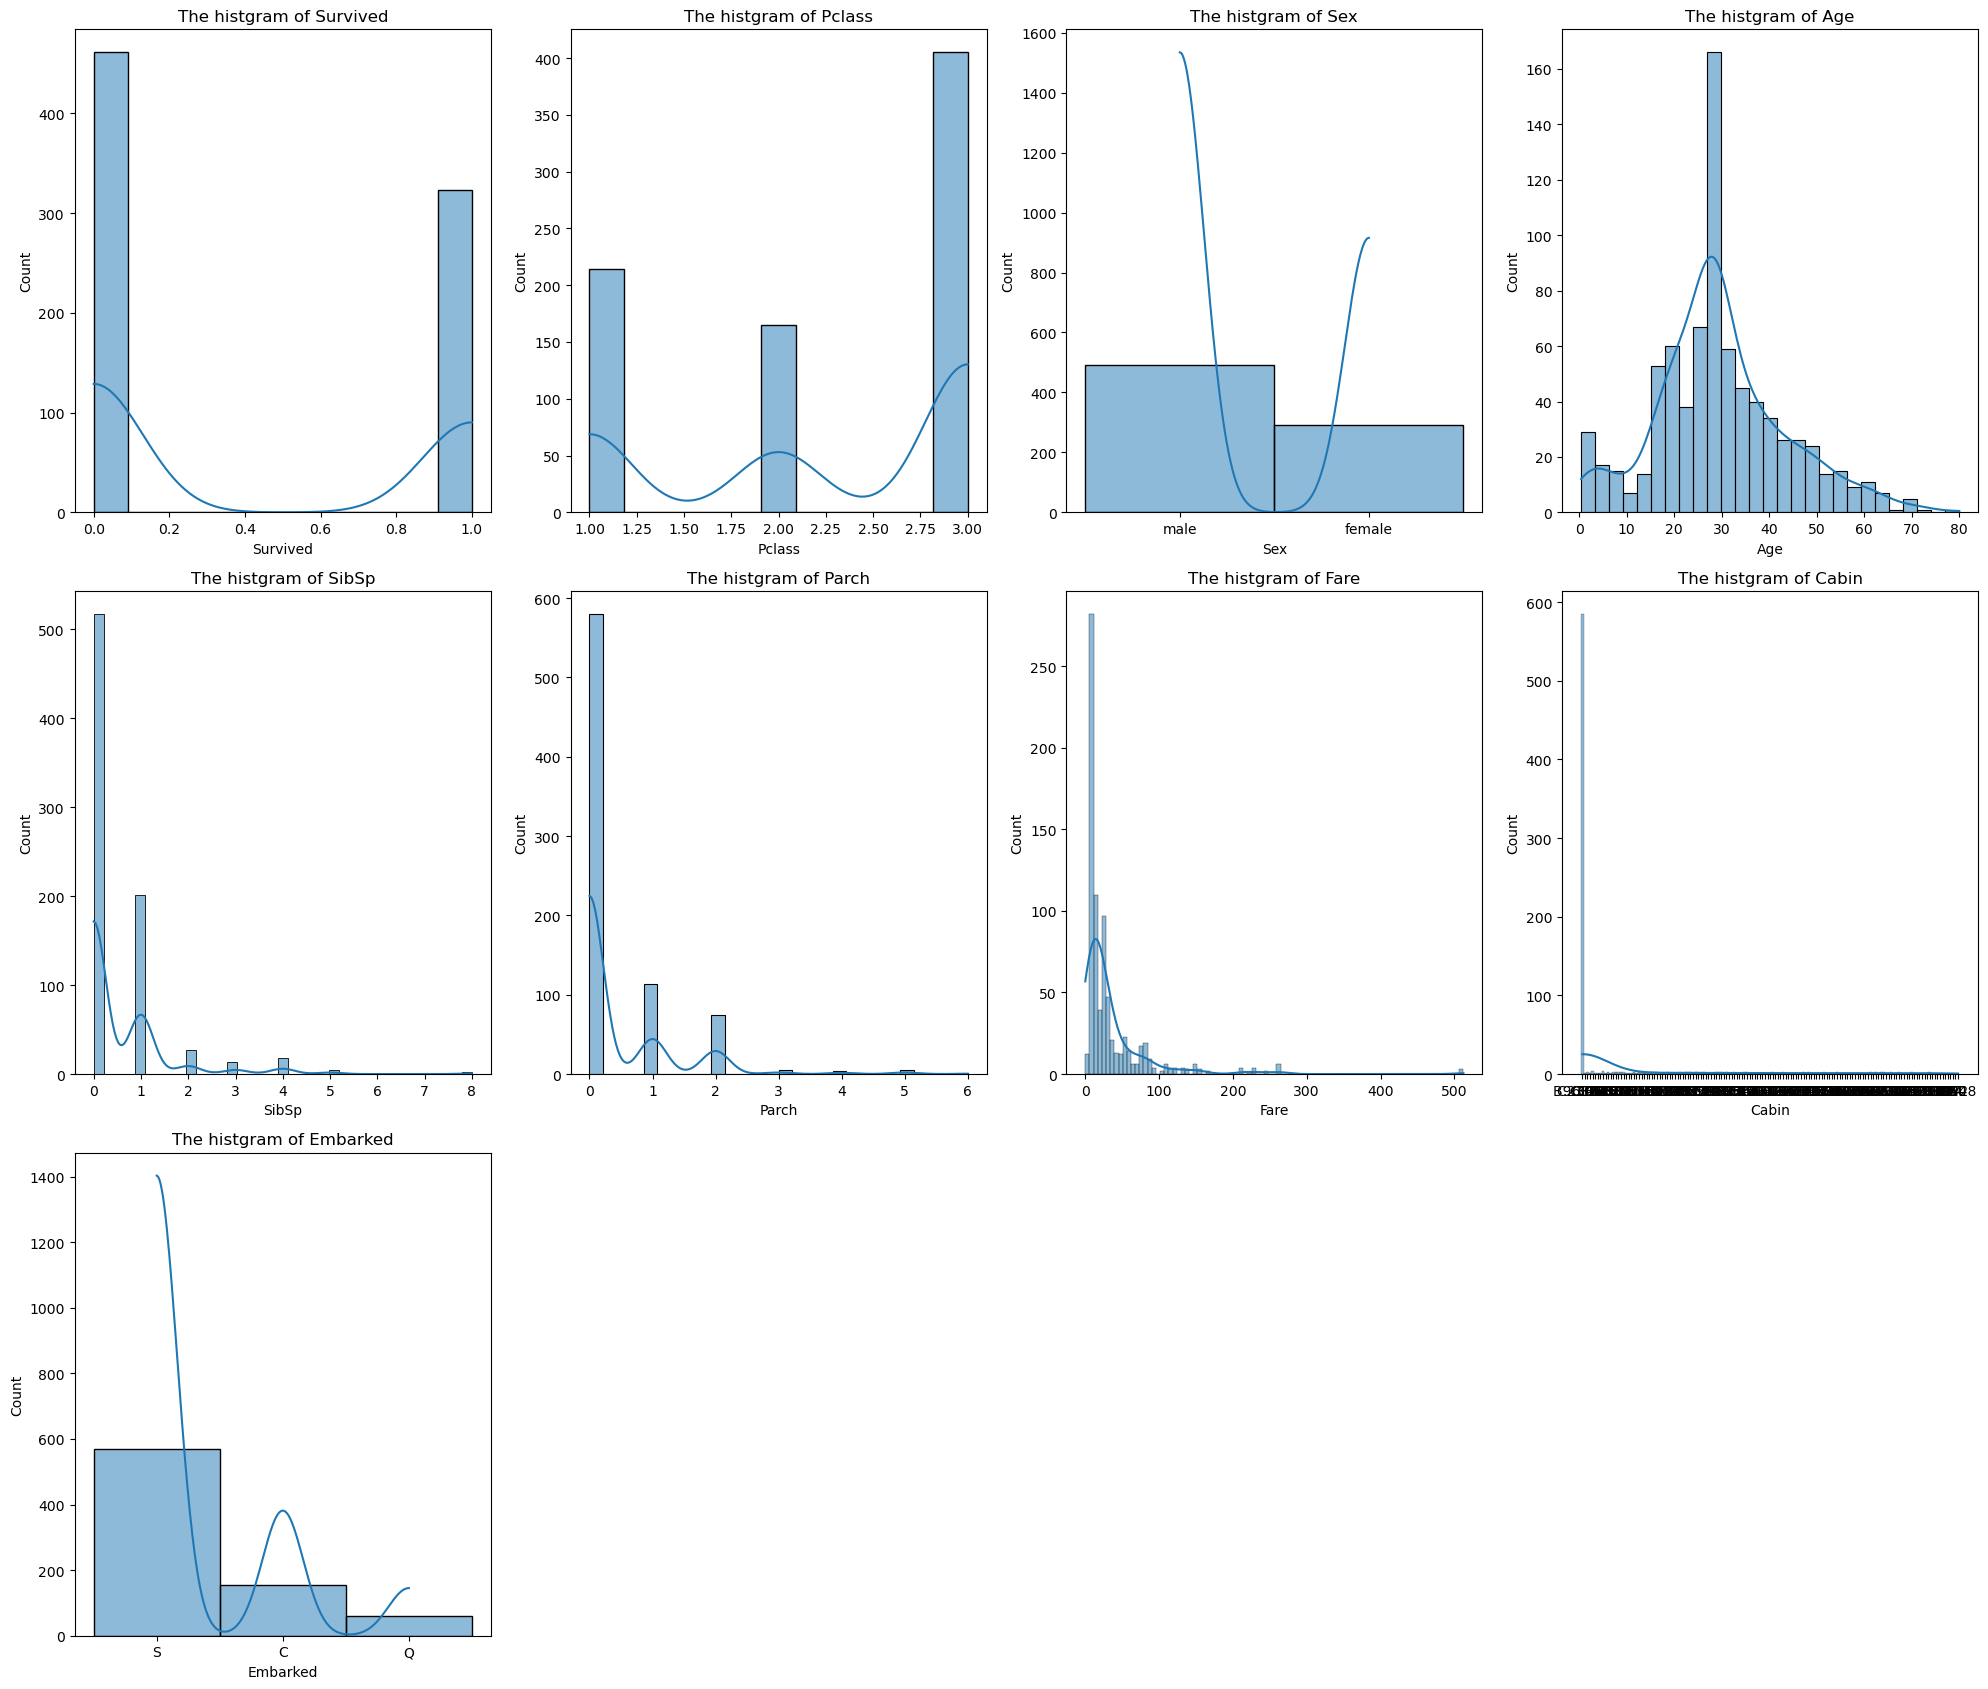

In [37]:
# To set figure size
plt.figure(figsize=(20,17))
for i,col in enumerate(df3.columns):
    plt.subplot(3,4,i+1)
    sns.histplot(df3[col],kde=True)
    plt.title(f'The histgram of {col}')
plt.tight_layout()
plt.show()

### Boxplots

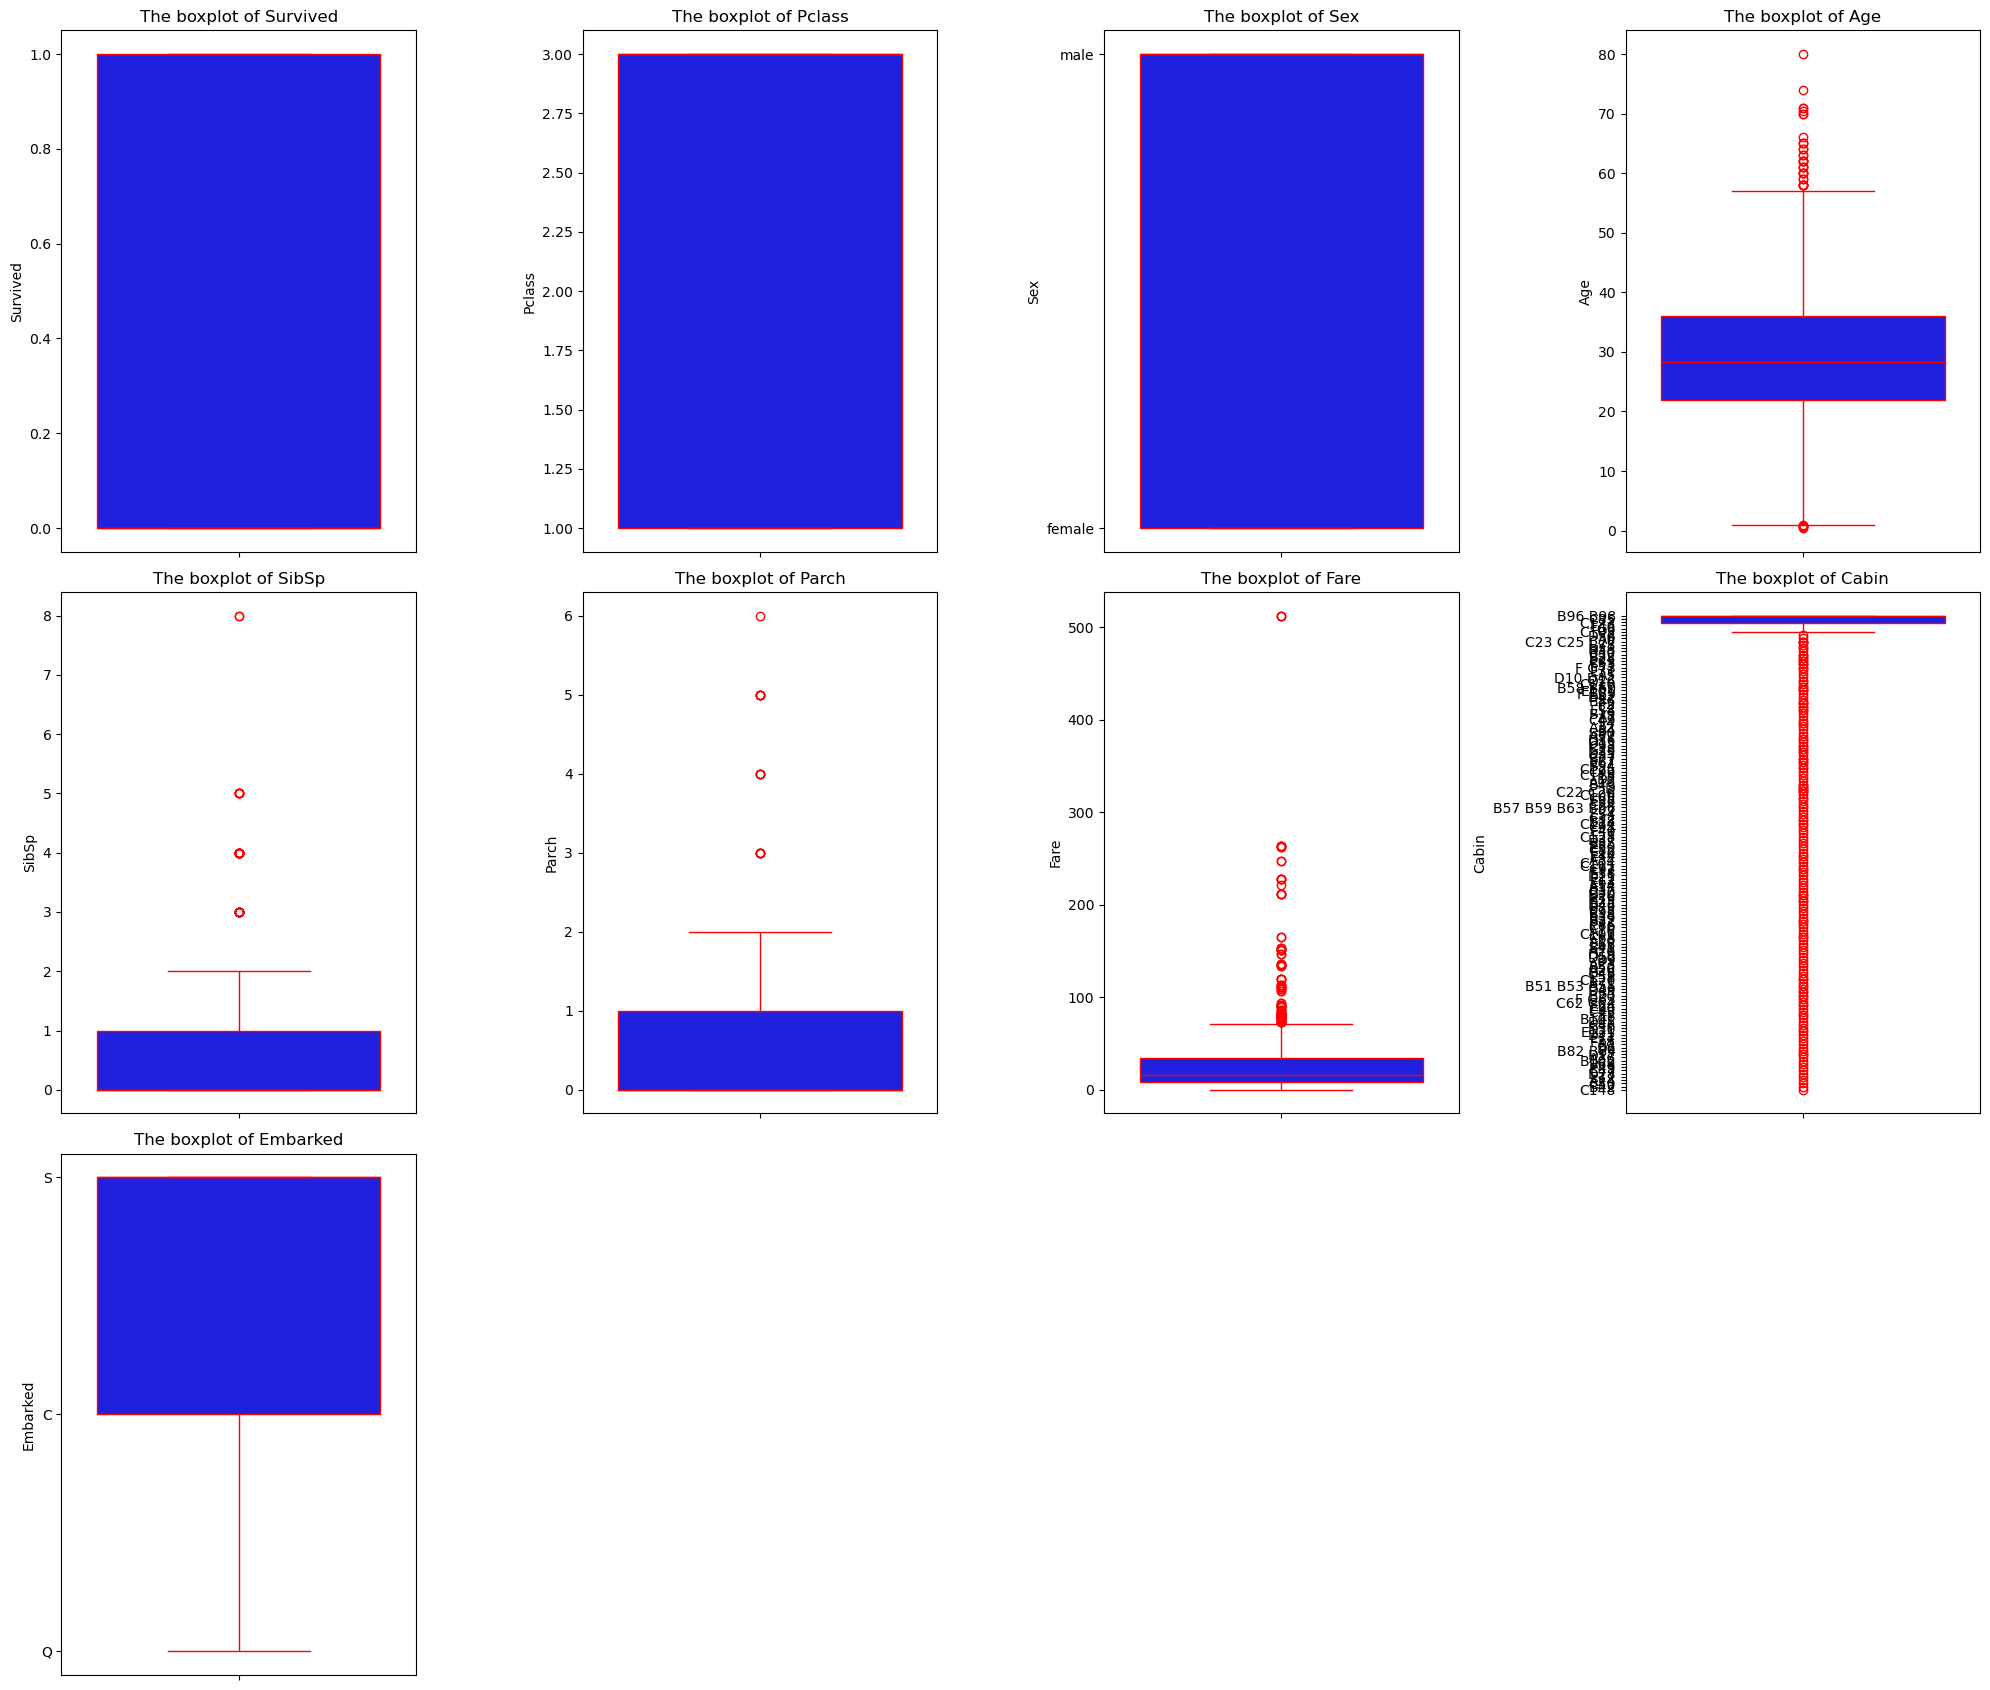

In [39]:
# To set figure size
plt.figure(figsize=(20,17))
for i,col in enumerate(df3.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df3[col],color='blue',linewidth=1,linecolor='red')
    plt.title(f'The boxplot of {col}')
plt.tight_layout()
plt.show()

In [40]:
# To remove outliers from the training dataset
def remove_outliers_replace_with_median(df3):
    for column in df3.select_dtypes(include=[np.number]).columns:
        Q1=df3[column].quantile(0.25)
        Q3=df3[column].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)
        median=df3[column].median()
        df3[column]=df3[column].apply(lambda x:median if x<lower_bound or x>upper_bound else x)
        return df3
df5=remove_outliers_replace_with_median(df3)
df5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.00,1,0,7.2500,B96 B98,S
1,1,1,female,38.00,1,0,71.2833,C85,C
2,1,3,female,26.00,0,0,7.9250,B96 B98,S
3,1,1,female,35.00,1,0,53.1000,C123,S
4,0,3,male,35.00,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.00,0,5,29.1250,B96 B98,Q
887,1,1,female,19.00,0,0,30.0000,B42,S
888,0,3,female,28.25,1,2,23.4500,B96 B98,S
889,1,1,male,26.00,0,0,30.0000,C148,C


### Pairplots

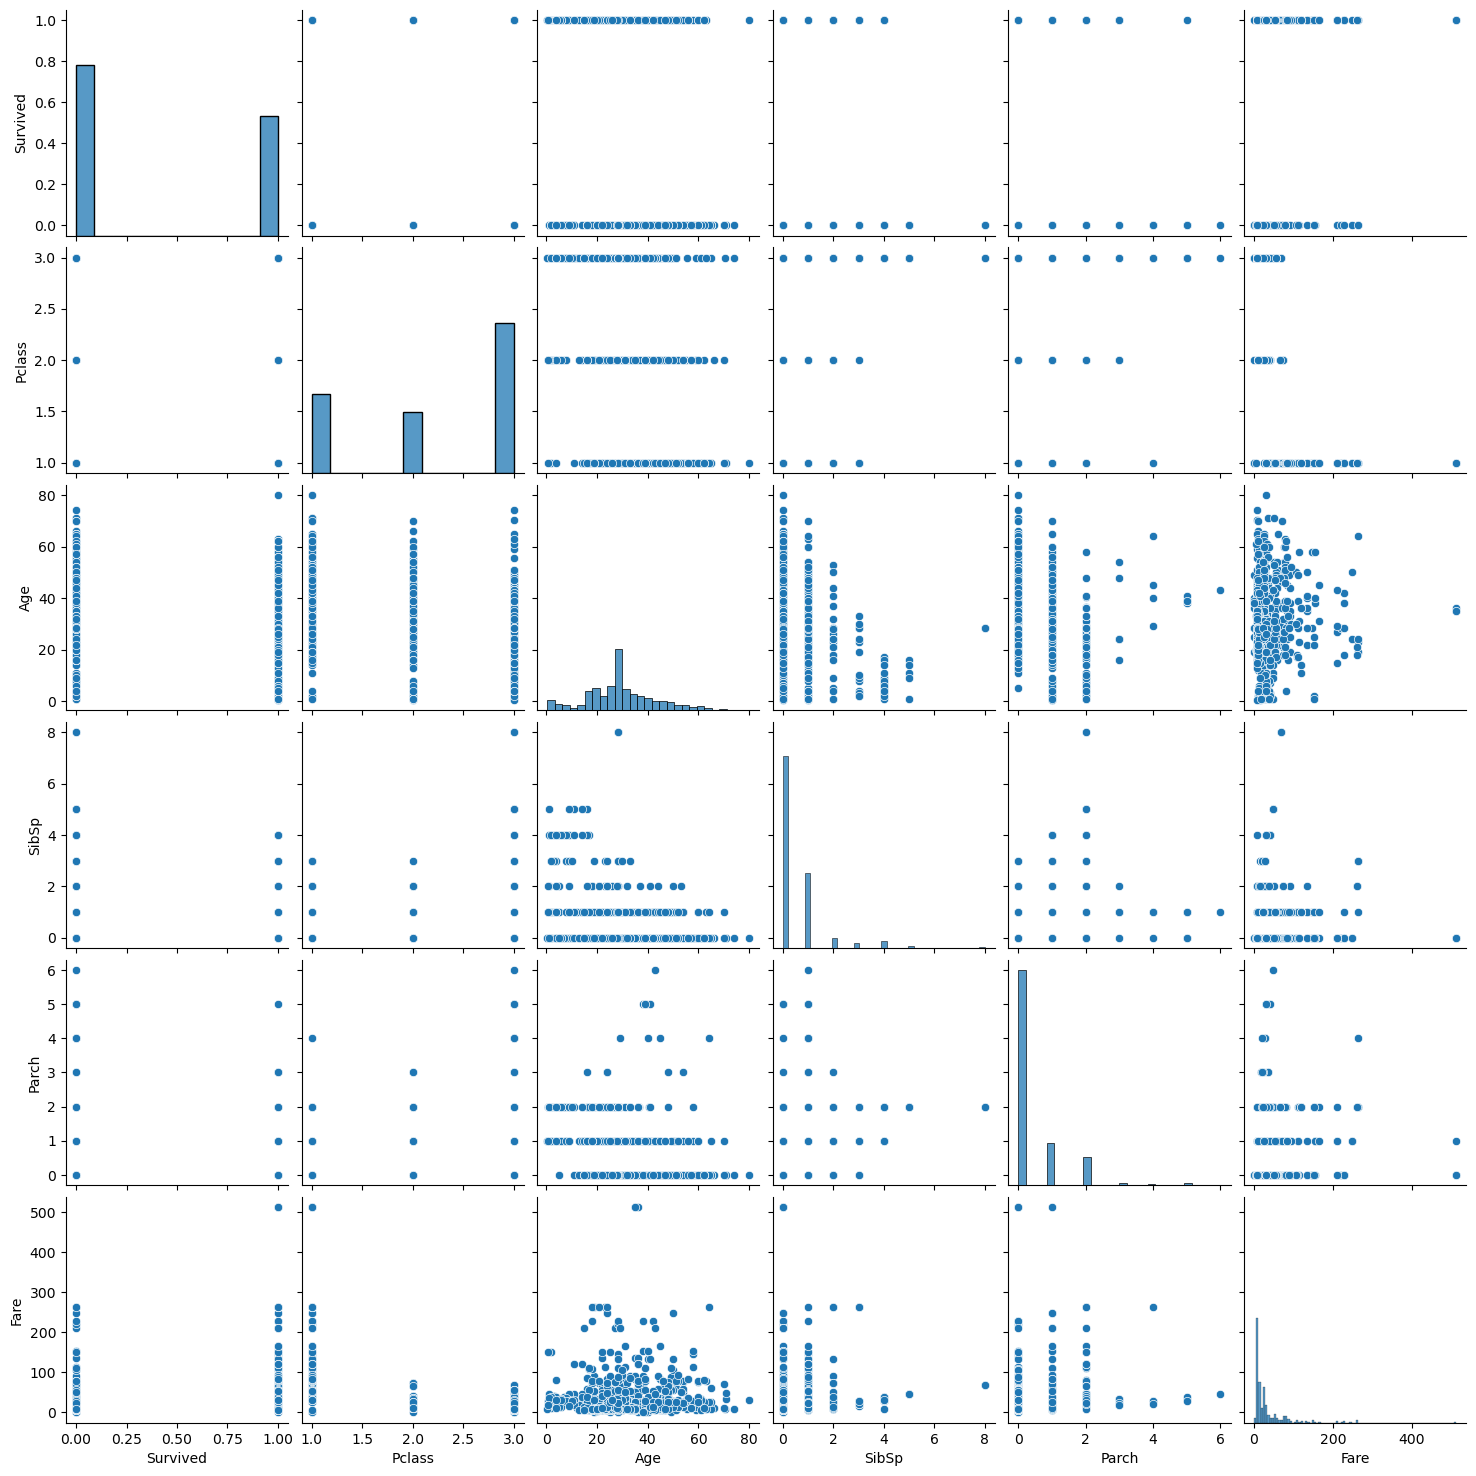

In [42]:
sns.pairplot(df5)
plt.show()

- As we can observe from the above pairplot except along diagonal no other features have proper auto-relation in training dataset

### Data visualization for testing dataset to find the distribution of data,outliers in the dataset

#### Data Visualization of testing data

#### Histogram

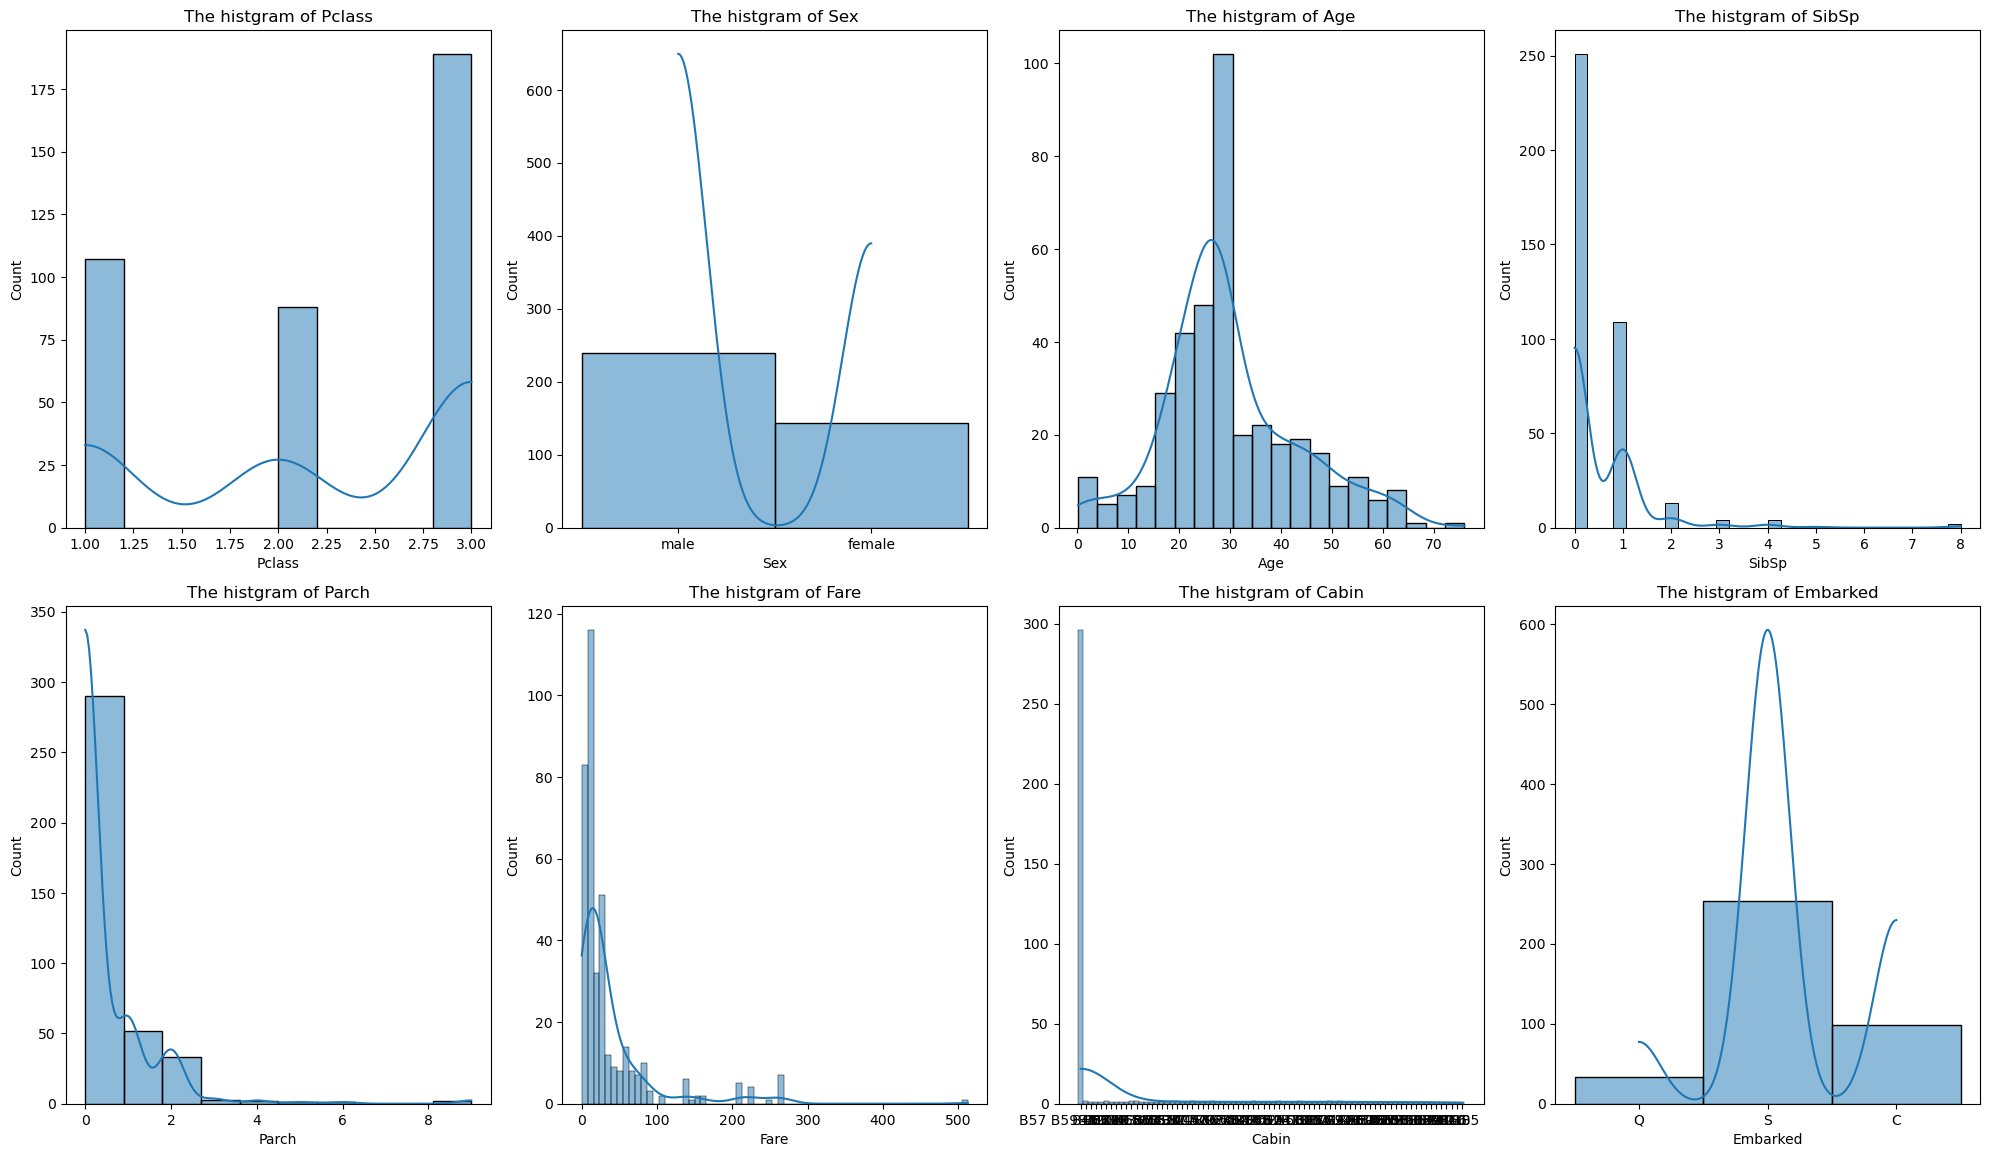

In [47]:
# To set figure size
plt.figure(figsize=(20,17))
for i,col in enumerate(df4.columns):
    plt.subplot(3,4,i+1)
    sns.histplot(df4[col],kde=True)
    plt.title(f'The histgram of {col}')
plt.tight_layout()
plt.show()

### Boxplots

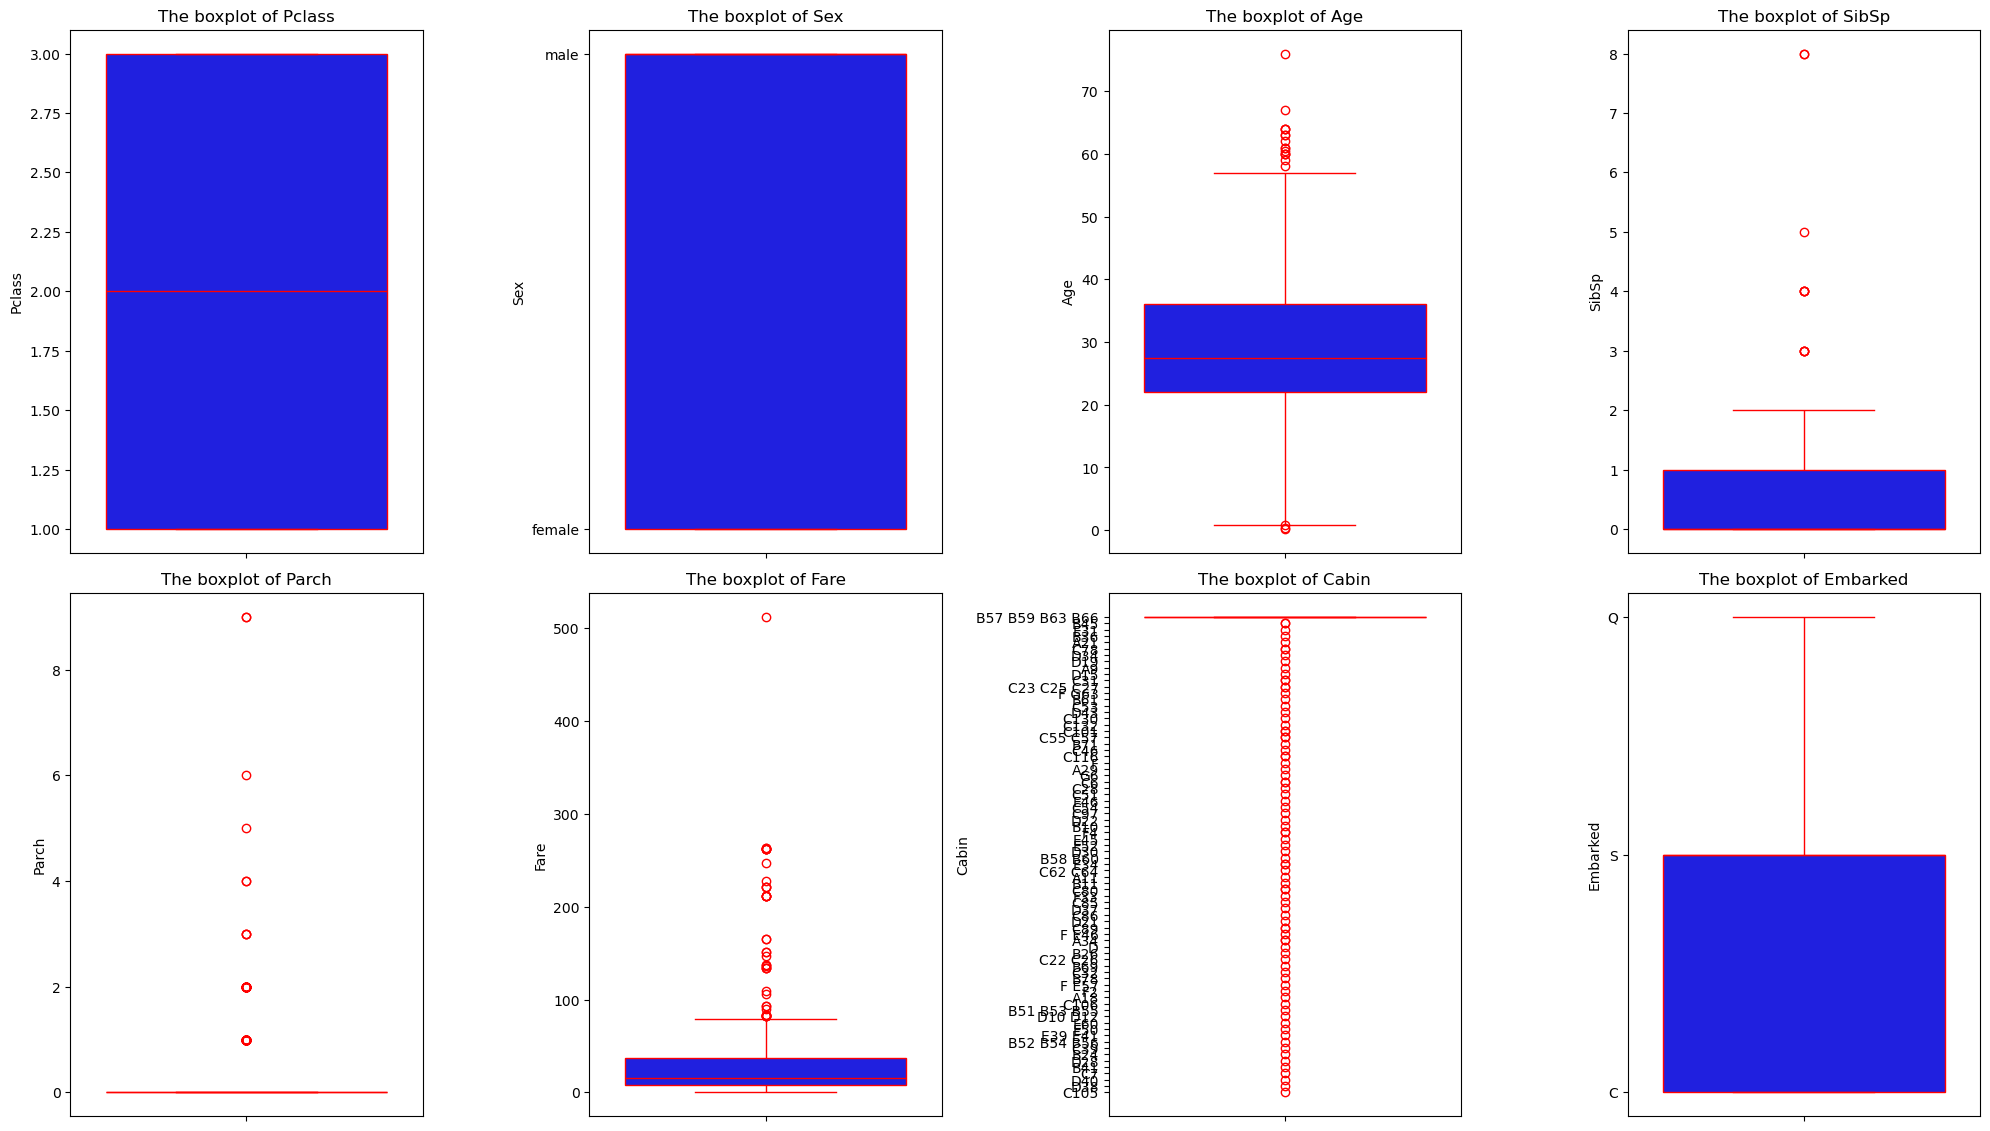

In [49]:
# To set figure size
plt.figure(figsize=(20,17))
for i,col in enumerate(df4.columns):
    plt.subplot(3,4,i+1)
    sns.boxplot(y=df4[col],color='blue',linewidth=1,linecolor='red')
    plt.title(f'The boxplot of {col}')
plt.tight_layout()
plt.show()

In [50]:
# To remove outliers from the testing dataset
def remove_outliers_replace_with_median(df4):
    for column in df4.select_dtypes(include=[np.number]).columns:
        Q1=df4[column].quantile(0.25)
        Q3=df4[column].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)
        median=df4[column].median()
        df4[column]=df4[column].apply(lambda x:median if x<lower_bound or x>upper_bound else x)
        return df4
df6=remove_outliers_replace_with_median(df4)
df6

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,B57 B59 B63 B66,Q
1,3,female,47.0,1,0,7.0000,B57 B59 B63 B66,S
2,2,male,62.0,0,0,9.6875,B57 B59 B63 B66,Q
3,3,male,27.0,0,0,8.6625,B57 B59 B63 B66,S
4,3,female,22.0,1,1,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...
411,1,female,37.0,1,0,90.0000,C78,Q
412,3,female,28.0,0,0,7.7750,B57 B59 B63 B66,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,B57 B59 B63 B66,S


### Pariplots

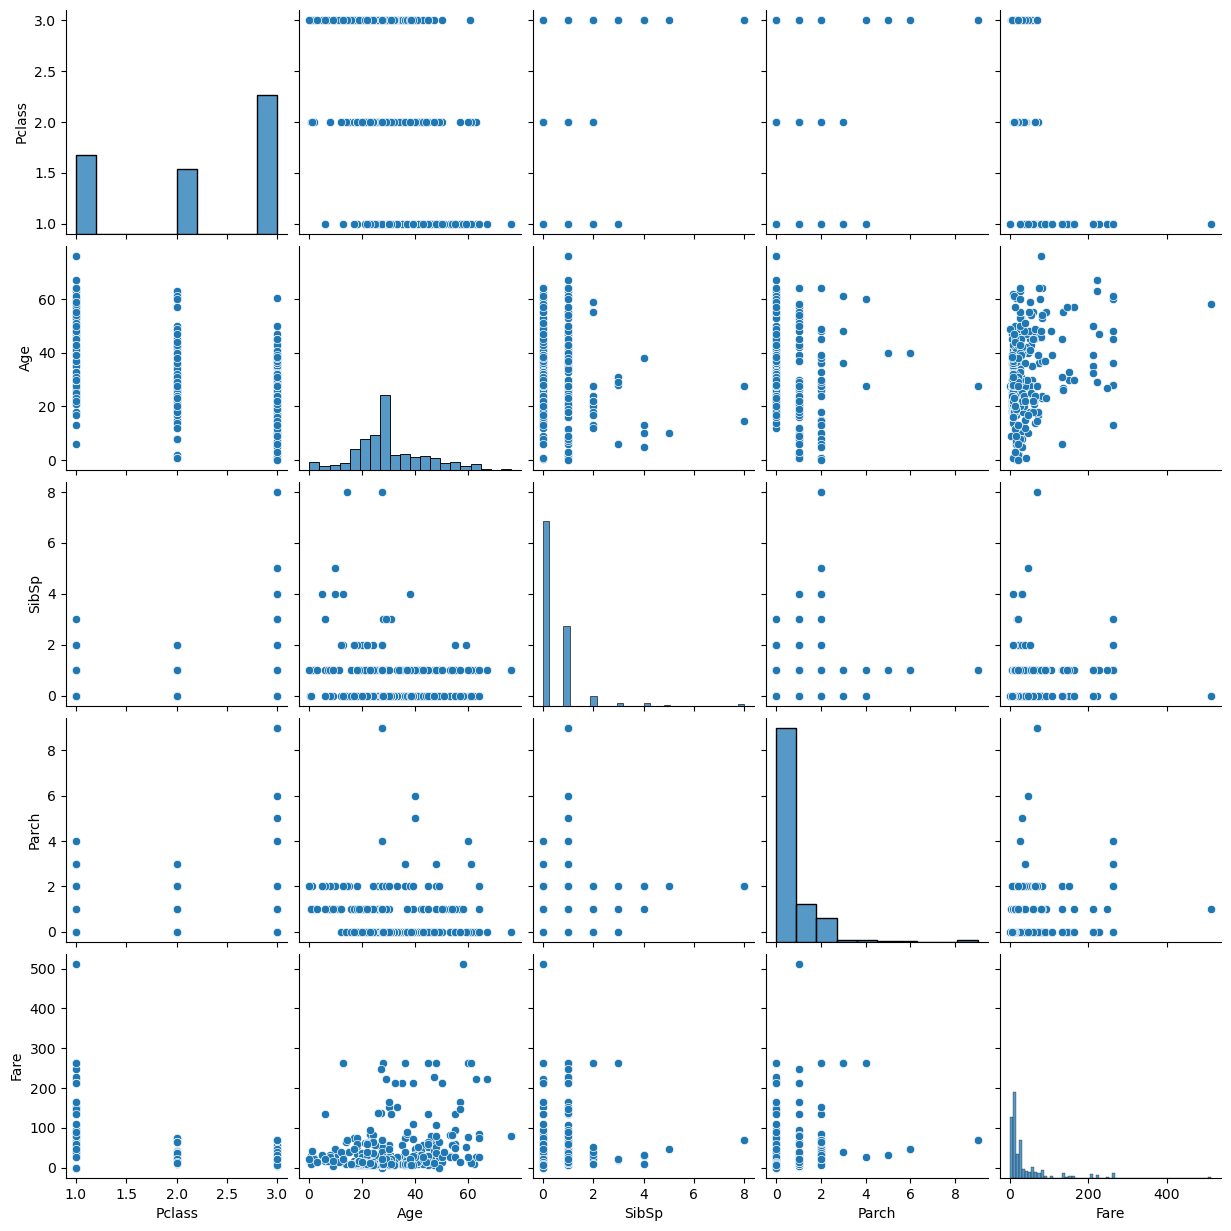

In [52]:
sns.pairplot(df6)
plt.show()

- As we can observe from the above pairplot except along diagonal no other features have proper auto-relation in training dataset

## Data Preprocessing

In [55]:
# converting the training dataset into LabelEncoder
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  784 non-null    int64  
 1   Pclass    784 non-null    int64  
 2   Sex       784 non-null    object 
 3   Age       784 non-null    float64
 4   SibSp     784 non-null    int64  
 5   Parch     784 non-null    int64  
 6   Fare      784 non-null    float64
 7   Cabin     784 non-null    object 
 8   Embarked  784 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 61.2+ KB


In [56]:
# To find the categorical columns in the training dataset
cat_tr=df5.select_dtypes(include=['object'])
cat_tr

,Sex,Cabin,Embarked
0,male,B96 B98,S
1,female,C85,C
2,female,B96 B98,S
3,female,C123,S
4,male,B96 B98,S
...,...,...,...
885,female,B96 B98,Q
887,female,B42,S
888,female,B96 B98,S
889,male,C148,C


In [57]:
num_tr=df5.select_dtypes(include=['int','float'])
num_tr

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.00,1,0,7.2500
1,1,1,38.00,1,0,71.2833
2,1,3,26.00,0,0,7.9250
3,1,1,35.00,1,0,53.1000
4,0,3,35.00,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.00,0,5,29.1250
887,1,1,19.00,0,0,30.0000
888,0,3,28.25,1,2,23.4500
889,1,1,26.00,0,0,30.0000


In [58]:
# from sklearn apply labelencoder for categorical columns
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
le_tr=[]
le_tr=pd.DataFrame(le_tr)
le_tr['Sex']=LE.fit_transform(cat_tr['Sex'])
le_tr['Cabin']=LE.fit_transform(cat_tr['Cabin'])
le_tr['Embarked']=LE.fit_transform(cat_tr['Embarked'])
le_tr

,Sex,Cabin,Embarked
0,1,47,2
1,0,81,0
2,0,47,2
3,0,55,2
4,1,47,2
...,...,...,...
779,0,47,1
780,0,30,2
781,0,47,2
782,1,60,0


In [59]:
#concatination of both numeric and encoded categorical columns
df7=pd.concat([num_tr.reset_index(drop=True),le_tr.reset_index(drop=True)],axis=1)
df7.to_csv('Titanic_data.csv',index=True)

In [60]:
# converting the testing dataset into LabelEncoder
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    384 non-null    int64  
 1   Sex       384 non-null    object 
 2   Age       384 non-null    float64
 3   SibSp     384 non-null    int64  
 4   Parch     384 non-null    int64  
 5   Fare      384 non-null    float64
 6   Cabin     384 non-null    object 
 7   Embarked  384 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 27.0+ KB


In [61]:
# To find the categorical columns in the testing dataset
cat_te=df6.select_dtypes(include=['object'])
cat_te

,Sex,Cabin,Embarked
0,male,B57 B59 B63 B66,Q
1,female,B57 B59 B63 B66,S
2,male,B57 B59 B63 B66,Q
3,male,B57 B59 B63 B66,S
4,female,B57 B59 B63 B66,S
...,...,...,...
411,female,C78,Q
412,female,B57 B59 B63 B66,S
414,female,C105,C
415,male,B57 B59 B63 B66,S


In [62]:
num_te=df6.select_dtypes(include=['int','float'])
num_te

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875
...,...,...,...,...,...
411,1,37.0,1,0,90.0000
412,3,28.0,0,0,7.7750
414,1,39.0,0,0,108.9000
415,3,38.5,0,0,7.2500


In [63]:
# from sklearn apply labelencoder for categorical columns
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
le_te=[]
le_te=pd.DataFrame(le_te)
le_te['Sex']=LE.fit_transform(cat_te['Sex'])
le_te['Cabin']=LE.fit_transform(cat_te['Cabin'])
le_te['Embarked']=LE.fit_transform(cat_te['Embarked'])
le_te

,Sex,Cabin,Embarked
0,1,15,1
1,0,15,2
2,1,15,1
3,1,15,2
4,0,15,2
...,...,...,...
379,0,41,1
380,0,15,2
381,0,22,0
382,1,15,2


In [64]:
#concatination of both numeric and encoded categorical columns
df8=pd.concat([num_te.reset_index(drop=True), le_te.reset_index(drop=True)], axis=1)
df8

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,3,34.5,0,0,7.8292,1,15,1
1,3,47.0,1,0,7.0000,0,15,2
2,2,62.0,0,0,9.6875,1,15,1
3,3,27.0,0,0,8.6625,1,15,2
4,3,22.0,1,1,12.2875,0,15,2
...,...,...,...,...,...,...,...,...
379,1,37.0,1,0,90.0000,0,41,1
380,3,28.0,0,0,7.7750,0,15,2
381,1,39.0,0,0,108.9000,0,22,0
382,3,38.5,0,0,7.2500,1,15,2


In [65]:
df7

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,0,3,22.00,1,0,7.2500,1,47,2
1,1,1,38.00,1,0,71.2833,0,81,0
2,1,3,26.00,0,0,7.9250,0,47,2
3,1,1,35.00,1,0,53.1000,0,55,2
4,0,3,35.00,0,0,8.0500,1,47,2
...,...,...,...,...,...,...,...,...,...
779,0,3,39.00,0,5,29.1250,0,47,1
780,1,1,19.00,0,0,30.0000,0,30,2
781,0,3,28.25,1,2,23.4500,0,47,2
782,1,1,26.00,0,0,30.0000,1,60,0


## Model building

In [67]:
x=df7.loc[:,['Pclass','Age','SibSp','Parch','Fare','Sex','Cabin','Embarked']]
y=df7['Survived']

In [68]:
# Build a model for training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [69]:
X_test=df8

In [70]:
# build the model fro sklearn
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_train

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [71]:
y_pred_test=model.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
      dtype=int64)

## Model Evaluation 

In [73]:
# evaluation of metrics for testing data like f1_score, precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(f'The confusion matrix:\n{confusion_matrix(y_test,y_pred_test)}\n')
ac_s = accuracy_score(y_test,y_pred_test)
print("accuracy score :",np.round(ac_s,3))
rs = recall_score(y_test,y_pred_test)
print("recall score :",np.round(rs,3))
ps = precision_score(y_test,y_pred_test)
print("Precision score :",np.round(ps,3))
F1 = f1_score(y_test,y_pred_test)
print("F1 score :",np.round(F1,3))

The confusion matrix:
[[102  15]
 [ 17  62]]

accuracy score : 0.837
recall score : 0.785
Precision score : 0.805
F1 score : 0.795


In [74]:
# now predict the target variable survived for testing dataset which is df8(not there in testing dataset)
Y_pred_test=model.predict(X_test)
Y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [75]:
# name the predicted columns
df8['Survived']=pd.DataFrame(Y_pred_test)
df8

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked,Survived
0,3,34.5,0,0,7.8292,1,15,1,0
1,3,47.0,1,0,7.0000,0,15,2,0
2,2,62.0,0,0,9.6875,1,15,1,0
3,3,27.0,0,0,8.6625,1,15,2,0
4,3,22.0,1,1,12.2875,0,15,2,0
...,...,...,...,...,...,...,...,...,...
379,1,37.0,1,0,90.0000,0,41,1,1
380,3,28.0,0,0,7.7750,0,15,2,1
381,1,39.0,0,0,108.9000,0,22,0,1
382,3,38.5,0,0,7.2500,1,15,2,0


In [76]:
new_order = ['Survived','Pclass','Age','SibSp','Parch','Fare','Sex','Cabin','Embarked'] 
df8=df8[new_order]
df8

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,0,3,34.5,0,0,7.8292,1,15,1
1,0,3,47.0,1,0,7.0000,0,15,2
2,0,2,62.0,0,0,9.6875,1,15,1
3,0,3,27.0,0,0,8.6625,1,15,2
4,0,3,22.0,1,1,12.2875,0,15,2
...,...,...,...,...,...,...,...,...,...
379,1,1,37.0,1,0,90.0000,0,41,1
380,1,3,28.0,0,0,7.7750,0,15,2
381,1,1,39.0,0,0,108.9000,0,22,0
382,0,3,38.5,0,0,7.2500,1,15,2


In [77]:
X=df8.iloc[:,1:9]
Y=df8['Survived']

In [78]:
# for training dataset
df7['predict_proba']=model.predict_proba(x)[:,1]
df7['predict_proba']

0      0.116478
1      0.910145
2      0.586580
3      0.857665
4      0.094958
         ...   
779    0.395135
780    0.929360
781    0.444136
782    0.666368
783    0.130699
Name: predict_proba, Length: 784, dtype: float64

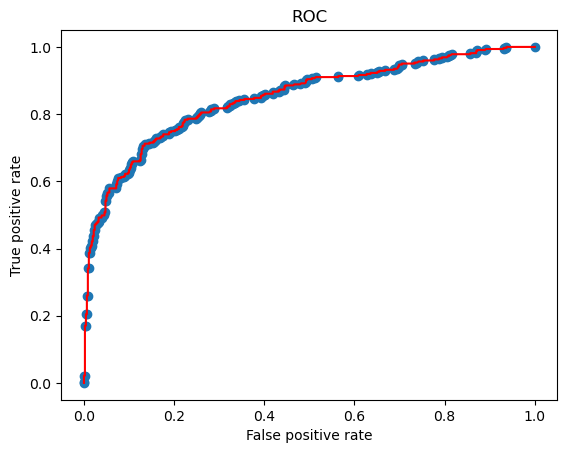

In [79]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,dummy = roc_curve(y,df7['predict_proba'])
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color= 'r')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC")
plt.show()

In [80]:
## for testing dataset
df8['predict_proba']=model.predict_proba(X)[:,1]
df8['predict_proba']

0      0.102661
1      0.274522
2      0.093033
3      0.108946
4      0.486302
         ...   
379    0.872927
380    0.524129
381    0.909282
382    0.071131
383    0.116391
Name: predict_proba, Length: 384, dtype: float64

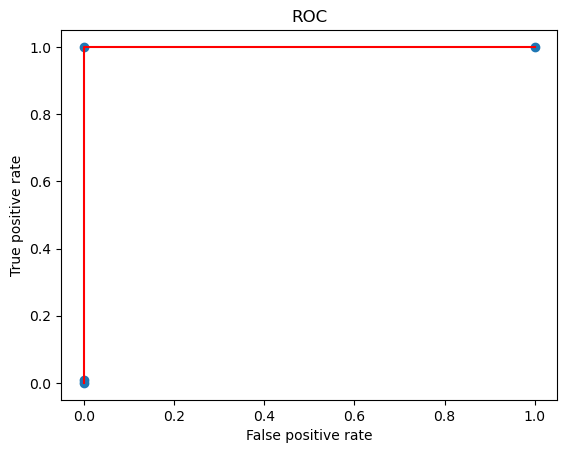

In [81]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,dummy = roc_curve(Y,df8['predict_proba'])
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color= 'r')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC")
plt.show()

## Interpretation

In [83]:
## for training dataset
auc_score = roc_auc_score(y,df7['predict_proba'])
print('Area Under Curve :',np.round(auc_score,3))

Area Under Curve : 0.849


In [84]:
## for testing dataset
auc_score = roc_auc_score(Y,df8['predict_proba'])
print('Area Under Curve :',np.round(auc_score,3))

Area Under Curve : 1.0


In [85]:
# a. Interpret the coefficients of the logistic regression model.
#columns
print(df7.columns)
# coefficients of features
model.coef_

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Cabin',
       'Embarked', 'predict_proba'],
      dtype='object')


array([[-1.00278954e+00, -4.05234712e-02, -2.97418942e-01,
        -1.03084866e-01,  1.32221858e-03, -2.23984240e+00,
         5.37530548e-03, -2.38576785e-01]])

## Discuss the significance of features in predicting the target variable (survival probability in this case).


### Feature Significance Discussion

**1. Sex:**  Male passengers had a lower survival rate than female passengers. This is a highly significant predictor.

**2. Pclass:** Passengers in higher classes (1st and 2nd) had better survival odds than those in 3rd class.
          Passenger class strongly correlates with survival.

**3. Age:** Age might show a complex relationship with survival.
        Children and young adults might have had a higher survival rate due to prioritization in lifeboats.  This needs further analysis beyond basic correlation.

**4. Fare:** A higher fare generally indicates a better cabin and potentially a higher social class,
        possibly correlating with increased survival probability.  Needs deeper exploration with visualizations.

**5. SibSp (Siblings/Spouses):**  The number of siblings or spouses aboard could affect survival.
          Large families might have faced challenges in getting on lifeboats together.
          A more nuanced analysis is required to interpret the impact.

**6. Cabin:** The presence or absence of cabin information ('cabin' feature) may indicate passenger class or location on the ship,
            impacting survival chances.  Passengers with registered cabins might have been located in more easily accessible areas during the evacuation.

**7. Embarked:** The port of embarkation might indirectly relate to passenger class or ticket type and could have influenced survival,
             but this is likely less significant than other factors.


## Interview Questions:

### 1. What is the difference between precision and recall?

**Precision:**
Precision measures the proportion of true positive results among all predicted positive results.
It focuses on the accuracy of the positive predictions.

**Recall:**
Recall measures the proportion of true positive results among all actual positive cases.
It focuses on capturing all relevant instances, prioritizing completeness over precision.

### 2. What is cross-validation, and why is it important in binary classification?

**Cross-Validation:**
Cross-validation is a technique to assess the performance of a model by splitting the dataset into training and testing subsets multiple times.
The most common method, k-fold cross-validation, divides data into k subsets, trains on k-1 subsets, and tests on the remaining one, rotating the test set for all folds.

**Importance in Binary Classification:**
Ensures that the model's evaluation is not biased by a single train-test split.
Helps detect overfitting and underfitting by providing a more reliable estimate of model performance across various subsets of the data.


In [185]:
## read final csv file for deployment
dff=pd.read_csv('Titanic_data.csv')
dff

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,0,0,3,22.00,1,0,7.2500,1,47,2
1,1,1,1,38.00,1,0,71.2833,0,81,0
2,2,1,3,26.00,0,0,7.9250,0,47,2
3,3,1,1,35.00,1,0,53.1000,0,55,2
4,4,0,3,35.00,0,0,8.0500,1,47,2
...,...,...,...,...,...,...,...,...,...,...
779,779,0,3,39.00,0,5,29.1250,0,47,1
780,780,1,1,19.00,0,0,30.0000,0,30,2
781,781,0,3,28.25,1,2,23.4500,0,47,2
782,782,1,1,26.00,0,0,30.0000,1,60,0


In [90]:
import pandas as pd
import streamlit as st
from sklearn.linear_model import LogisticRegression
import pickle

### To dump the model

In [91]:
pickle.dump(model,open('clf.pkle','wb'))

In [92]:
'''
st.title('Model Deployment : LogisticRegression')
st.sidebar.header('User Input Parameters')
def user_input_teatures():
    # # Input variables from the user

    Pclass = st.sidebar.selectbox("Passenger_class",('1','2','3'))
    Age = st.sidebar.number_input('Insert the age')
    SibSp = st.sidebar.selectbox("Number of Siblings/Spouses (SibSp)",('0','1','2','3','4','5','8'))
    Parch = st.sidebar.selectbox("Number of Parents/Children (Parch)",('0','1','2','3','4','5','6'))
    Fare = st.sidebar.number_input(" Insert the Fare value")
    Sex = st.sidebar.selectbox("Gender",('0','1'))
    Cabin = st.sidebar.number_input('Insert the cabin number ')
    Embarked = st.sidebar.selectbox('Embarked',('0','1','2'))
    # Combine inputs into a single array
    data = {'Pclass':Pclass,
            'Age':Age,
            'SibSp':SibSp,
            'Parch':Parch,
            'Fare':Fare,
            'Sex':Sex,
            'Cabin':Cabin,
            'Embarked':Embarked}
    features = pd.DataFrame(data,index = [0])
    return features
input_data = user_input_features()
st.subheader('User Input Parameters')
st.write(input_data)
Titanic_data = pd.read_csv('Titanic_data.csv')
Titanic_data.drop(['Survived'],inplace = True, axis = 1)
Titanic_data = Titanic_data.dropna()

 # Make prediction

x = Titanic_data.iloc[:,2:]
y = Titanic_data.iloc[:,1:]
clf = LogisticRegression()
clf.fit(x,y)
prediction = clf.predict(input_data)
prediction_proba = clf.predict_proba(input_data)
st.subhearder("Predicted Result")
st.write( "Survived" if prediction[0] == 1 else "Did Not Survive")
st.subheader('Prediction Probability')
st.write(prediction_proba)
'''

'\nst.title(\'Model Deployment : LogisticRegression\')\nst.sidebar.header(\'User Input Parameters\')\ndef user_input_teatures():\n    # # Input variables from the user\n\n    Pclass = st.sidebar.selectbox("Passenger_class",(\'1\',\'2\',\'3\'))\n    Age = st.sidebar.number_input(\'Insert the age\')\n    SibSp = st.sidebar.selectbox("Number of Siblings/Spouses (SibSp)",(\'0\',\'1\',\'2\',\'3\',\'4\',\'5\',\'8\'))\n    Parch = st.sidebar.selectbox("Number of Parents/Children (Parch)",(\'0\',\'1\',\'2\',\'3\',\'4\',\'5\',\'6\'))\n    Fare = st.sidebar.number_input(" Insert the Fare value")\n    Sex = st.sidebar.selectbox("Gender",(\'0\',\'1\'))\n    Cabin = st.sidebar.number_input(\'Insert the cabin number \')\n    Embarked = st.sidebar.selectbox(\'Embarked\',(\'0\',\'1\',\'2\'))\n    # Combine inputs into a single array\n    data = {\'Pclass\':Pclass,\n            \'Age\':Age,\n            \'SibSp\':SibSp,\n            \'Parch\':Parch,\n            \'Fare\':Fare,\n            \'Sex\':Sex,